In [ ]:
!pip install face_recognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 22.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=844220c363a5b01457937d53677dbeac5f72fd178dbd13f4cb347d0046b9b551
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import csv
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

In [ ]:
real_folder = '/content/drive/MyDrive/DeepFake/Celeb_real_face_only'
fake_folder = '/content/drive/MyDrive/DeepFake/Celeb_fake_face_only'

In [ ]:
# real_folder = '/content/drive/MyDrive/DeepFake/Celeb_real_face_only'
# fake_folder = '/content/drive/MyDrive/DeepFake/Celeb_fake_face_only'

# videos = []
# with open('/content/drive/MyDrive/DeepFake/video_labels.csv', 'w', newline='') as csvfile:
#   writer = csv.writer(csvfile)
#   writer.writerow(['video', 'label'])
#   for video in os.listdir(real_folder):
#     if video.endswith(('.mp4', '.avi', '.mov')):  # Add more video extensions if needed
#       videos.append(os.path.join(real_folder, video))
#       writer.writerow([os.path.join(real_folder, video), 'REAL'])
#   for video in os.listdir(fake_folder):
#     if video.endswith(('.mp4', '.avi', '.mov')):
#       videos.append(os.path.join(fake_folder, video))
#       writer.writerow([os.path.join(fake_folder, video), 'FAKE'])


# videos = []
# with open('/content/drive/MyDrive/DeepFake/video_labels.csv', 'r', newline='') as csvfile:
#   reader = csv.reader(csvfile)
#   next(reader)  # Skip the header row
#   for row in reader:
#     video_path = row[0]
#     label = row[1]
#     videos.append( video_path)

# print(len(videos))



1508


In [ ]:
import pandas as pd

In [ ]:
video_labels = pd.read_csv('/content/drive/MyDrive/DeepFake/video_labels.csv')
df=pd.DataFrame(video_labels)
df.head(5)

,video,label
0,/content/drive/MyDrive/DeepFake/Celeb_real_fac...,REAL
1,/content/drive/MyDrive/DeepFake/Celeb_real_fac...,REAL
2,/content/drive/MyDrive/DeepFake/Celeb_real_fac...,REAL
3,/content/drive/MyDrive/DeepFake/Celeb_real_fac...,REAL
4,/content/drive/MyDrive/DeepFake/Celeb_real_fac...,REAL


In [ ]:
frame_count = []
cnt_tem=0
for video in videos:
  cnt_tem+=1
  if cnt_tem%100==0:
    print(cnt_tem)
  cap = cv2.VideoCapture(video)
  if(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))<100):
    videos.remove(video)
    os.remove(video)
    continue
  frame_count.append(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))

print("no. of videos: ", len(videos))

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
no. of videos:  1503


In [ ]:
import pickle

# Save the 'videos' variable to a file to be used later
with open('/content/drive/MyDrive/DeepFake/videos.pkl', 'wb') as f:
  pickle.dump(videos, f)


In [ ]:
#load videos.pkl
import pickle

with open('/content/drive/MyDrive/DeepFake/videos.pkl', 'rb') as f:
  videos = pickle.load(f)

In [ ]:
print(videos)

['/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0000.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0002.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0001.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0003.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0004.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0005.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0006.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0007.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0009.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0008.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id10_0000.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id10_0001.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id10_0003.mp4', '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id10_0002.mp4', '/content/drive/MyDrive/DeepF

In [ ]:
print(len(videos))

1503


In [ ]:
import glob

def is_corrupted(video_path):
  try:
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
      return True

    # Try to read a few frames
    for _ in range(50):
      ret, frame = cap.read()
      if not ret:
        return True

    cap.release()
    return False
  except:
    return True

corrupted_videos = [video for video in videos if is_corrupted(video)]
cnt_tem=0
for video in corrupted_videos:
  if cnt_tem%10==0:
    print(cnt_tem)
  cnt_tem+=1
  os.remove(video)
  videos.remove(video)

print(f"no. of corrupted videos: {len(corrupted_videos)}")
print(f"no. of remaining videos: {len(videos)}")



no. of corrupted videos: 0
no. of remaining videos: 1503


In [ ]:
class VideoDataset(Dataset):
    """
    A custom dataset class for loading video frames and their labels.

    Attributes:
        video_names (list): List of video file paths.
        labels (DataFrame): DataFrame containing video file names and their corresponding labels.
        sequence_length (int): Number of frames to extract from each video.
        transform (callable, optional): A function/transform to apply to each frame.
    """

    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.sequence_length = sequence_length

    def __len__(self):
        """
        Return the total number of videos in the dataset.
        """
        return len(self.video_names)

    def __getitem__(self, idx):
        """
        Retrieve a video and its label by index.

        Args:
            idx (int): Index of the video to retrieve.

        Returns:
            tuple: A tuple containing a tensor of frames and the video label.
        """
        video_path = self.video_names[idx]
        frames = []
        # Calculate interval for selecting frames
        a = int(100 / self.sequence_length)
        first_frame = np.random.randint(0, a)

        temp_video = video_path

        # Retrieve the label for the video
        label_row = self.labels[self.labels["video"] == temp_video]
        if not label_row.empty:
            label = label_row.iloc[0, 1]
            label = 0 if label == 'FAKE' else 1  # Convert label to binary
        else:
            raise ValueError(f"Label for video {temp_video} not found.")

        # Extract frames from the video
        for i, frame in enumerate(self.frame_extract(video_path)):
            if self.transform:
                frame = self.transform(frame)
            frames.append(frame)
            if len(frames) == self.sequence_length:
                break

        frames = torch.stack(frames)
        frames = frames[:self.sequence_length]  # Ensure the length matches sequence_length

        return frames, label

    def frame_extract(self, path):
        """
        Generator to yield frames from a video file.

        Args:
            path (str): Path to the video file.

        Yields:
            np.ndarray: The next frame from the video.
        """
        vid_obj = cv2.VideoCapture(path)
        success, image = vid_obj.read()
        while success:
            yield image
            success, image = vid_obj.read()
        vid_obj.release()

def im_plot(tensor):
    """
    Plot an image tensor using matplotlib.

    Args:
        tensor (torch.Tensor): Image tensor to be plotted.
    """
    image = tensor.cpu().numpy().transpose(1, 2, 0)  # Convert tensor to HWC format
    b, g, r = cv2.split(image)
    image = cv2.merge((r, g, b))
    # Apply normalization (assumes that the tensor was normalized)
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = image * 255.0
    plt.imshow(image.astype(np.uint8))
    plt.show()


In [ ]:
import pandas as pd

def number_of_real_and_fake_videos(data_list, labels):
    """
    Count the number of fake and real videos based on the provided data list and labels.

    Args:
        data_list (list): List of video file paths.
        labels (DataFrame): DataFrame containing video file names and their corresponding labels.

    Returns:
        tuple: A tuple containing the count of real videos and the count of fake videos.
    """

    fake = 0
    real = 0

    for video_path in data_list:
        # Extract the video file name from the path
        temp_video = video_path

        # Check if the video file exists in the labels DataFrame
        if temp_video in labels['video'].values:
            # Get the label for the video
            label = labels.loc[labels["video"] == temp_video, "label"].values[0]

            # Increment the counters based on the label
            if label == 'FAKE':
                fake += 1
            elif label == 'REAL':
                real += 1
        else:
            print(f"Warning: {temp_video} not found in labels.")

    return real, fake


In [ ]:
#shuffle videos list
from sklearn.model_selection import train_test_split
np.random.shuffle(videos)
train_videos = videos[:int(0.8*len(videos))]
valid_videos = videos[int(0.8*len(videos)):]
print("train : " , len(train_videos))
print("test : " , len(valid_videos))
# train_videos,valid_videos = train_test_split(data,test_size = 0.2)
# print(train_videos)

print("TRAIN: ", "Real:",number_of_real_and_fake_videos(train_videos,video_labels)[0]," Fake:",number_of_real_and_fake_videos(train_videos,video_labels)[1])
print("TEST: ", "Real:",number_of_real_and_fake_videos(valid_videos,video_labels)[0]," Fake:",number_of_real_and_fake_videos(valid_videos,video_labels)[1])

train :  1202
test :  301
TRAIN:  Real: 468  Fake: 734
TEST:  Real: 120  Fake: 181


In [ ]:
print(video_labels)

                                                  video label
0     /content/drive/MyDrive/DeepFake/Celeb_real_fac...  REAL
1     /content/drive/MyDrive/DeepFake/Celeb_real_fac...  REAL
2     /content/drive/MyDrive/DeepFake/Celeb_real_fac...  REAL
3     /content/drive/MyDrive/DeepFake/Celeb_real_fac...  REAL
4     /content/drive/MyDrive/DeepFake/Celeb_real_fac...  REAL
...                                                 ...   ...
1503  /content/drive/MyDrive/DeepFake/Celeb_fake_fac...  FAKE
1504  /content/drive/MyDrive/DeepFake/Celeb_fake_fac...  FAKE
1505  /content/drive/MyDrive/DeepFake/Celeb_fake_fac...  FAKE
1506  /content/drive/MyDrive/DeepFake/Celeb_fake_fac...  FAKE
1507  /content/drive/MyDrive/DeepFake/Celeb_fake_fac...  FAKE

[1508 rows x 2 columns]


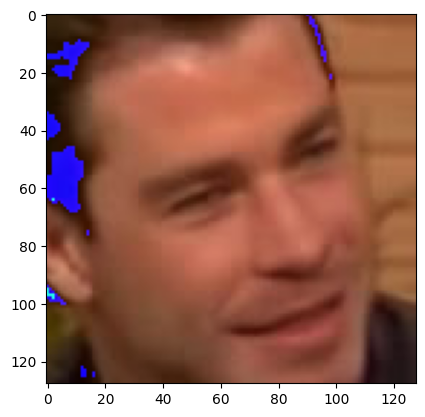

In [ ]:


# Image size and normalization parameters
im_size = 128
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Define transformations for training and validation data
train_transforms = transforms.Compose([
    transforms.ToPILImage(),                      # Convert frame to PIL Image
    transforms.Resize((im_size, im_size)),        # Resize frame to the target size (112x112)
    transforms.ToTensor(),                        # Convert PIL Image to Tensor
    transforms.Normalize(mean, std)               # Normalize the tensor with given mean and std
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),                      # Convert frame to PIL Image
    transforms.Resize((im_size, im_size)),        # Resize frame to the target size (112x112)
    transforms.ToTensor(),                        # Convert PIL Image to Tensor
    transforms.Normalize(mean, std)               # Normalize the tensor with given mean and std
])

# Initialize datasets with transformations
train_data = VideoDataset(train_videos, video_labels, sequence_length=10, transform=train_transforms)
val_data = VideoDataset(valid_videos, video_labels, sequence_length=10, transform=test_transforms)

# Create DataLoader for training data
train_loader = DataLoader(
    train_data,
    batch_size=4,         # Number of videos per batch
    shuffle=True,         # Shuffle data for training
    num_workers=4         # Number of subprocesses to use for data loading
)

# Create DataLoader for validation data
valid_loader = DataLoader(
    val_data,
    batch_size=4,         # Number of videos per batch
    shuffle=False,        # No need to shuffle validation data
    num_workers=4         # Number of subprocesses to use for data loading
)

# Retrieve a sample from the training dataset
image, label = train_data[0]

# Plot the first frame of the video (assuming it's a 4D tensor: [sequence, channels, height, width])
im_plot(image[0, : , :, :])


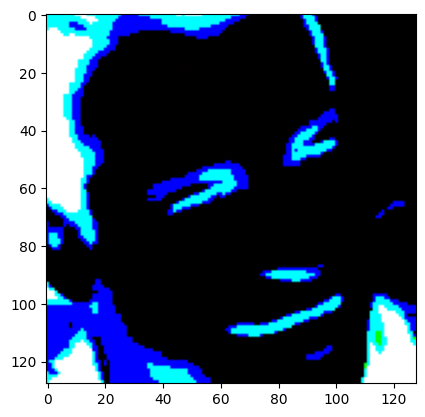

In [ ]:
im_plot2(image[0, : , :, :])

In [ ]:
def frame_extract2(path):
        """
        Generator to yield frames from a video file.

        Args:
            path (str): Path to the video file.

        Yields:
            np.ndarray: The next frame from the video.
        """
        vid_obj = cv2.VideoCapture(path)
        success, image = vid_obj.read()
        while success:
            yield image
            success, image = vid_obj.read()
        vid_obj.release()

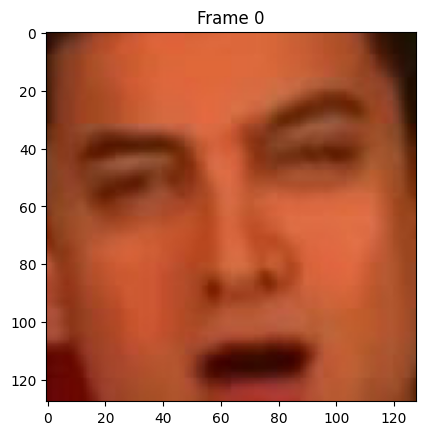

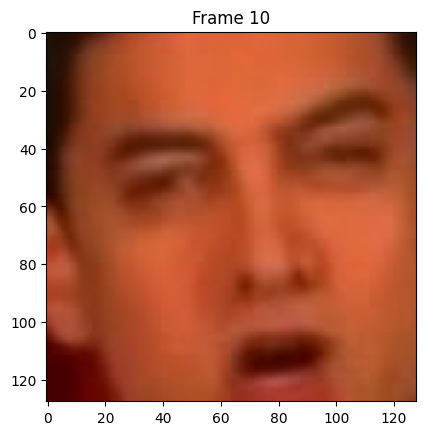

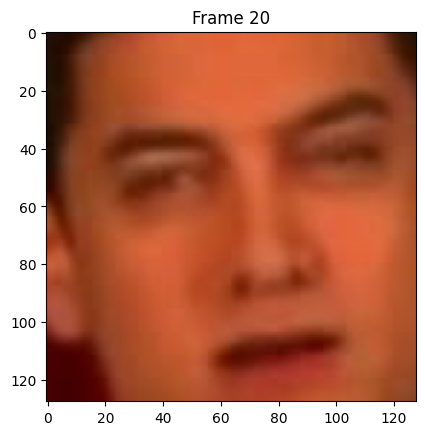

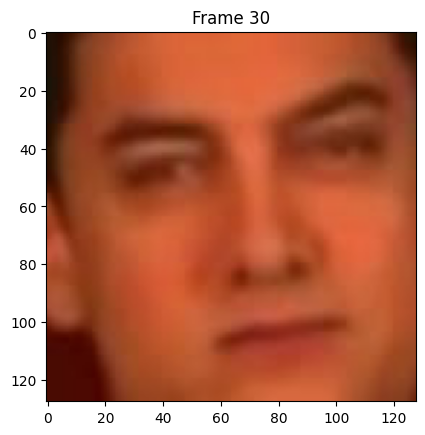

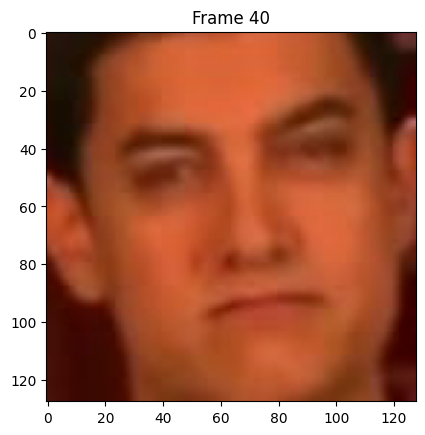

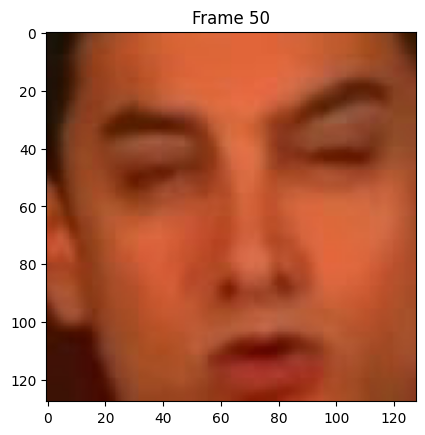

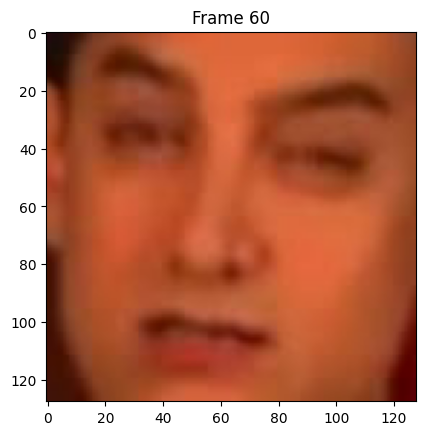

In [ ]:
# prompt: #using frame_extract2 to extract frames and plotting frames

# Get a sample video path (replace with your actual video path)
video_path2 = '/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0000.mp4';

# Extract frames using frame_extract2
for i, frame in enumerate(frame_extract2(video_path2)):
  if i % 10 == 0:  # Process every 10th frame
    # Convert the frame to RGB (OpenCV uses BGR)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Display the frame using Matplotlib
    plt.imshow(frame_rgb)
    plt.title(f"Frame {i}")
    plt.show()

    if i > 50:  # Limit the number of frames to process
      break






In [ ]:
def im_plot2(tensor):
    """
    Plot an image tensor using matplotlib.

    Args:
        tensor (torch.Tensor): Image tensor to be plotted.
    """
    image = tensor.cpu().numpy().transpose(1, 2, 0)  # Convert tensor to HWC format
    b, g, r = cv2.split(image)
    image = cv2.merge((r, g, b))
    # Apply normalization (assumes that the tensor was normalized)
    # image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    # image = image * 255.0
    plt.imshow(image.astype(np.uint8))
    plt.show()

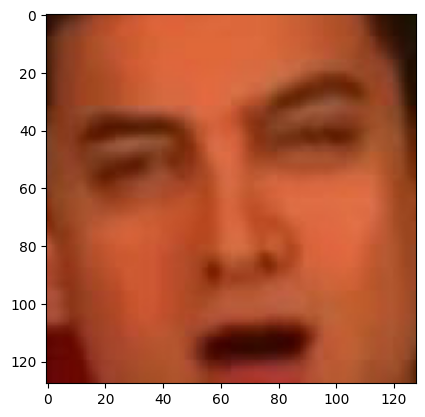

In [ ]:
vidcap = cv2.VideoCapture(video_path2)
success,imagex2 = vidcap.read()
imagex2 = cv2.cvtColor(imagex2, cv2.COLOR_BGR2RGB)
plt.imshow(imagex2)
plt.show()

torch.Size([3, 128, 128])


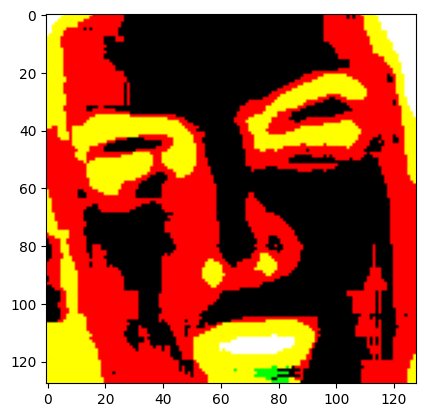

In [ ]:
# prompt: #get first frame of video_path2 and convert to tensors

vidcap = cv2.VideoCapture(video_path2)
success,imagex = vidcap.read()
if success:
  imagex = cv2.cvtColor(imagex, cv2.COLOR_BGR2RGB)
  imagex = train_transforms(imagex)
  print(imagex.shape)


im_plot2(imagex[:,:,:])

In [ ]:
vidcap2 = cv2.VideoCapture(video_path2)
success,imagex2 = vidcap.read()


In [ ]:
test_frames=frame_extract2('/content/drive/MyDrive/DeepFake/Celeb_real_face_only/id0_0000.mp4')

In [ ]:
print(test_frames)

<generator object frame_extract2 at 0x787bd5edfb50>


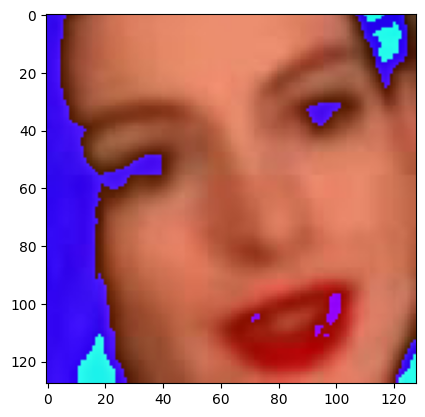

In [ ]:
train_data = VideoDataset(train_videos, video_labels, sequence_length=10, transform=train_transforms)
val_data = VideoDataset(valid_videos, video_labels, sequence_length=10, transform=test_transforms)

# Create DataLoader for training data
train_loader = DataLoader(
    train_data,
    batch_size=4,         # Number of videos per batch
    shuffle=True,         # Shuffle data for training
    num_workers=4         # Number of subprocesses to use for data loading
)

# Create DataLoader for validation data
valid_loader = DataLoader(
    val_data,
    batch_size=4,         # Number of videos per batch
    shuffle=False,        # No need to shuffle validation data
    num_workers=4         # Number of subprocesses to use for data loading
)

image, label = train_data[4]

# Plot the first frame of the video (assuming it's a 4D tensor: [sequence, channels, height, width])
im_plot(image[0,: , :, :])

In [ ]:
from torch import nn
import torchvision.models as models

In [ ]:
class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, lstm_layers=2, hidden_dim=2048, bidirectional=True):
        """
        Initialize the Model class.

        Args:
            num_classes (int): Number of output classes.
            latent_dim (int): Dimension of the input to the LSTM (features from CNN).
            lstm_layers (int): Number of LSTM layers.
            hidden_dim (int): Dimension of the hidden state in the LSTM.
            bidirectional (bool): Whether the LSTM is bidirectional.
        """
        super(Model, self).__init__()

        # Load a pre-trained ResNeXt model and remove the last two layers
        model = models.resnext50_32x4d(pretrained=True)
        self.model = nn.Sequential(*list(model.children())[:-2])

        # LSTM for sequence modeling
        self.lstm = nn.LSTM(
            latent_dim,
            hidden_dim,
            num_layers=lstm_layers,
            bidirectional=bidirectional,
            batch_first=True
        )

        # Non-linearity and dropout
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)

        # Adjust input dimension for the Linear layer based on bidirectionality
        lstm_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.linear1 = nn.Linear(lstm_output_dim, num_classes)

        # Average pooling layer to reduce spatial dimensions to 1x1
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (Tensor): Input tensor of shape (batch_size, seq_length, channels, height, width).

        Returns:
            Tuple: (fmap, output) where:
                - fmap (Tensor): Feature map from CNN.
                - output (Tensor): Classification logits.
        """
        batch_size, seq_length, c, h, w = x.shape

        # Reshape input tensor for CNN
        x = x.view(batch_size * seq_length, c, h, w)

        # Extract features using the CNN
        fmap = self.model(x)

        # Apply average pooling to reduce spatial dimensions
        x = self.avgpool(fmap)

        # Flatten the output from CNN and reshape for LSTM
        x = x.view(batch_size, seq_length, -1)

        # Pass through LSTM
        x_lstm, _ = self.lstm(x)

        # Compute the mean of LSTM outputs over the sequence length
        x_lstm_mean = torch.mean(x_lstm, dim=1)

        # Apply dropout and linear layer for classification
        output = self.dp(self.linear1(x_lstm_mean))

        return fmap, output


In [ ]:
model = Model(2).cuda()
a,b = model(torch.from_numpy(np.empty((1,20,3,112,112))).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    """
    Trains the model for one epoch.

    Args:
        epoch (int): Current epoch number.
        num_epochs (int): Total number of epochs.
        data_loader (DataLoader): DataLoader for training data.
        model (nn.Module): Model to train.
        criterion (nn.Module): Loss function.
        optimizer (torch.optim.Optimizer): Optimizer.

    Returns:
        float: Average training loss for the epoch.
        float: Average training accuracy for the epoch.
    """
    model.train()  # Set model to training mode
    losses = AverageMeter()  # Initialize loss tracker
    accuracies = AverageMeter()  # Initialize accuracy tracker

    # Iterate over the batches in the data_loader
    for i, (inputs, targets) in enumerate(data_loader):
        # Move tensors to GPU if available
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()

        # Forward pass
        _, outputs = model(inputs)

        # Compute loss and accuracy
        loss = criterion(outputs, targets)
        acc = calculate_accuracy(outputs, targets)

        # Update loss and accuracy meters
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))

        # Zero the gradients, perform backpropagation, and update weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
            % (epoch, num_epochs, i, len(data_loader), losses.avg, accuracies.avg)
        )

    # Save the model state
    torch.save(model.state_dict(), '/content/checkpoint.pt')

    return losses.avg, accuracies.avg

def test(epoch, model, data_loader, criterion):
    """
    Tests the model.

    Args:
        epoch (int): Current epoch number.
        model (nn.Module): Model to test.
        data_loader (DataLoader): DataLoader for validation data.
        criterion (nn.Module): Loss function.

    Returns:
        list: True labels.
        list: Predicted labels.
        float: Average test loss.
        float: Average test accuracy.
    """
    print('Testing')
    model.eval()  # Set model to evaluation mode
    losses = AverageMeter()  # Initialize loss tracker
    accuracies = AverageMeter()  # Initialize accuracy tracker
    pred = []  # List to store predicted labels
    true = []  # List to store true labels

    with torch.no_grad():  # Disable gradient calculation
        for i, (inputs, targets) in enumerate(data_loader):
            # Move tensors to GPU if available
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.LongTensor)
                inputs = inputs.cuda()

            # Forward pass
            _, outputs = model(inputs)

            # Compute loss and accuracy
            loss = criterion(outputs, targets)
            acc = calculate_accuracy(outputs, targets)

            # Get predicted labels
            _, p = torch.max(outputs, 1)
            true += targets.cpu().numpy().tolist()
            pred += p.cpu().numpy().tolist()

            # Update loss and accuracy meters
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))

            # Print progress
            sys.stdout.write(
                "\r[Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (i, len(data_loader), losses.avg, accuracies.avg)
            )

        print('\nAccuracy {}'.format(accuracies.avg))

    return true, pred, losses.avg, accuracies.avg

class AverageMeter(object):
    """
    Computes and stores the average and current value.
    """
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, targets):
    """
    Calculates the accuracy of the model predictions.

    Args:
        outputs (Tensor): Model outputs.
        targets (Tensor): True labels.

    Returns:
        float: Accuracy in percentage.
    """
    # Get the predictions by finding the index with the maximum value
    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100 * n_correct_elems / targets.size(0)


In [ ]:
import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

[Epoch 1/20] [Batch 300 / 301] [Loss: 0.460515, Acc: 82.28%]Testing
[Batch 75 / 76] [Loss: nan, Acc: 60.47%]
Accuracy 60.46511627906977
[Epoch 2/20] [Batch 300 / 301] [Loss: 0.408663, Acc: 86.27%]Testing
[Batch 75 / 76] [Loss: nan, Acc: 60.47%]
Accuracy 60.46511627906977
[Epoch 3/20] [Batch 300 / 301] [Loss: 0.336289, Acc: 89.27%]Testing
[Batch 75 / 76] [Loss: nan, Acc: 60.47%]
Accuracy 60.46511627906977
[Epoch 4/20] [Batch 300 / 301] [Loss: 0.355082, Acc: 88.60%]Testing
[Batch 75 / 76] [Loss: nan, Acc: 60.47%]
Accuracy 60.46511627906977
[Epoch 5/20] [Batch 300 / 301] [Loss: 0.311935, Acc: 91.60%]Testing
[Batch 75 / 76] [Loss: nan, Acc: 60.47%]
Accuracy 60.46511627906977
[Epoch 6/20] [Batch 300 / 301] [Loss: 0.315060, Acc: 90.60%]Testing
[Batch 75 / 76] [Loss: nan, Acc: 60.47%]
Accuracy 60.46511627906977
[Epoch 7/20] [Batch 300 / 301] [Loss: 0.302255, Acc: 93.09%]Testing
[Batch 75 / 76] [Loss: nan, Acc: 60.47%]
Accuracy 60.46511627906977
[Epoch 8/20] [Batch 300 / 301] [Loss: 0.271906, 

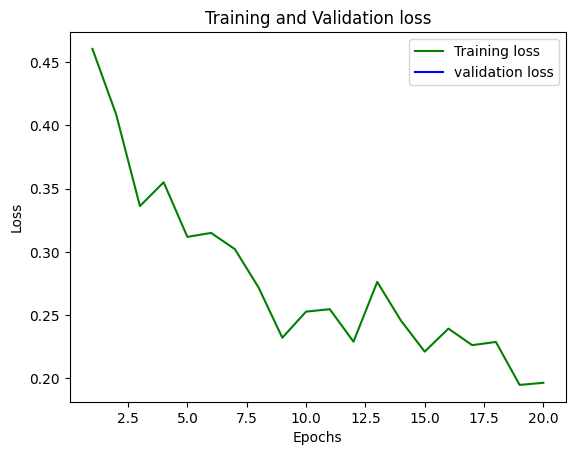

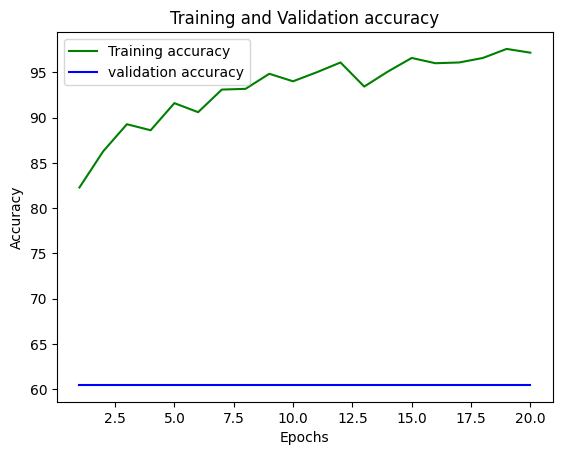

[[182   0]
 [119   0]]
True positive =  182
False positive =  0
False negative =  119
True negative =  0




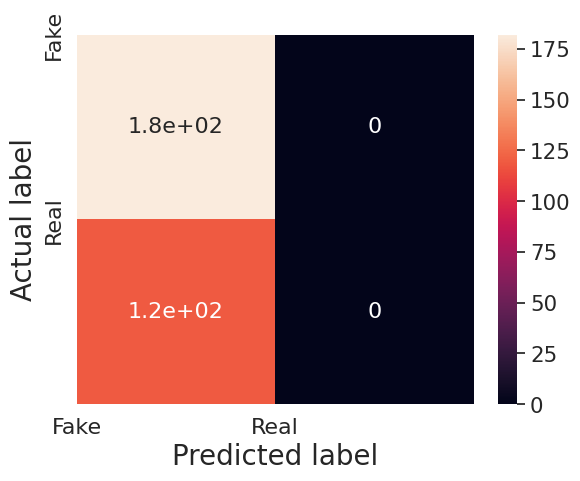

Calculated Accuracy 60.46511627906976
Model saved to /content/mcheckpoint.pt


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Set learning rate and number of epochs
lr = 1e-5  # Learning rate for the optimizer
num_epochs = 20  # Total number of epochs for training

# Initialize the optimizer with Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
# weight_decay adds L2 regularization to prevent overfitting

# Define the loss function
# Uncomment and modify the following lines if class weights are needed
# class_weights = torch.from_numpy(np.asarray([1, 15])).type(torch.FloatTensor).cuda()
# criterion = nn.CrossEntropyLoss(weight=class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()  # Standard CrossEntropyLoss for classification tasks

# Lists to store average loss and accuracy for plotting
train_loss_avg = []  # Training loss averaged over epochs
train_accuracy = []  # Training accuracy averaged over epochs
test_loss_avg = []   # Validation loss averaged over epochs
test_accuracy = []   # Validation accuracy averaged over epochs

# Training and evaluation loop
for epoch in range(1, num_epochs + 1):
    # Train the model for one epoch
    l, acc = train_epoch(epoch, num_epochs, train_loader, model, criterion, optimizer)
    train_loss_avg.append(l)  # Store training loss for this epoch
    train_accuracy.append(acc)  # Store training accuracy for this epoch

    # Evaluate the model on the validation set
    true, pred, tl, t_acc = test(epoch, model, valid_loader, criterion)
    test_loss_avg.append(tl)  # Store validation loss for this epoch
    test_accuracy.append(t_acc)  # Store validation accuracy for this epoch

# Plot training and validation loss
plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
# Plot training and validation accuracy
plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

# Print confusion matrix to evaluate classification performance
print(confusion_matrix(true, pred))
# Print confusion matrix in a more readable format
print_confusion_matrix(true, pred)

# Save the model's state dictionary after training
torch.save(model.state_dict(), '/content/drive/MyDrive/DeepFake.pt')
print("Model saved to /content/mcheckpoint.pt")


In [ ]:
import torchvision.models as models

class Model2(nn.Module):
    def __init__(self, num_classes, latent_dim=512, lstm_layers=2, hidden_dim=512, bidirectional=True):
        super(Model, self).__init__()

        # Load a pre-trained ResNet18 model and remove the last two layers
        model = models.resnet18(pretrained=True)
        self.model = nn.Sequential(*list(model.children())[:-2])

        # LSTM for sequence modeling
        self.lstm = nn.LSTM(
            latent_dim,
            hidden_dim,
            num_layers=lstm_layers,
            bidirectional=bidirectional,
            batch_first=True
        )

        # Non-linearity and dropout
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)

        # Adjust input dimension for the Linear layer based on bidirectionality
        lstm_output_dim = hidden_dim * 2 if bidirectional else hidden_dim
        self.linear1 = nn.Linear(lstm_output_dim, num_classes)

        # Average pooling layer to reduce spatial dimensions to 1x1
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, -1)
        x_lstm, _ = self.lstm(x)
        x_lstm_mean = torch.mean(x_lstm, dim=1)
        output = self.dp(self.linear1(x_lstm_mean))
        return fmap, output


In [ ]:

def training(model_name,name_save):
  # Set learning rate and number of epochs
  lr = 1e-5  # Learning rate for the optimizer
  num_epochs = 20  # Total number of epochs for training

  # Initialize the optimizer with Adam optimizer
  optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
  # weight_decay adds L2 regularization to prevent overfitting

  # Define the loss function
  # Uncomment and modify the following lines if class weights are needed
  # class_weights = torch.from_numpy(np.asarray([1, 15])).type(torch.FloatTensor).cuda()
  # criterion = nn.CrossEntropyLoss(weight=class_weights).cuda()
  criterion = nn.CrossEntropyLoss().cuda()  # Standard CrossEntropyLoss for classification tasks

  # Lists to store average loss and accuracy for plotting
  train_loss_avg = []  # Training loss averaged over epochs
  train_accuracy = []  # Training accuracy averaged over epochs
  test_loss_avg = []   # Validation loss averaged over epochs
  test_accuracy = []   # Validation accuracy averaged over epochs

  # Training and evaluation loop
  for epoch in range(1, num_epochs + 1):
      # Train the model for one epoch
      l, acc = train_epoch(epoch, num_epochs, train_loader, model_name, criterion, optimizer)
      train_loss_avg.append(l)  # Store training loss for this epoch
      train_accuracy.append(acc)  # Store training accuracy for this epoch

      # Evaluate the model on the validation set
      true, pred, tl, t_acc = test(epoch, model_name, valid_loader, criterion)
      test_loss_avg.append(tl)  # Store validation loss for this epoch
      test_accuracy.append(t_acc)  # Store validation accuracy for this epoch

  # Plot training and validation loss
  plot_loss(train_loss_avg, test_loss_avg, len(train_loss_avg))
  # Plot training and validation accuracy
  plot_accuracy(train_accuracy, test_accuracy, len(train_accuracy))

  # Print confusion matrix to evaluate classification performance
  print(confusion_matrix(true, pred))
  # Print confusion matrix in a more readable format
  print_confusion_matrix(true, pred)

  # Save the model's state dictionary after training
  torch.save(model.state_dict(), f'/content/drive/MyDrive/DeepFake/{name_save}')
  print(f"Model saved to /content/drive/MyDrive/DeepFake/{name_save}")


In [ ]:
#Model with feature visualization
from torch import nn
from torchvision import models
class Model3(nn.Module):
    def __init__(self, num_classes,latent_dim= 2048, lstm_layers=1 , hidden_dim = 2048, bidirectional = False):
        super(Model3, self).__init__()
        model = models.resnext50_32x4d(pretrained = True) #Residual Network CNN
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim,hidden_dim, lstm_layers,  bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048,num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
    def forward(self, x):
        batch_size,seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size,seq_length,2048)
        x_lstm,_ = self.lstm(x,None)
        return fmap,self.dp(self.linear1(torch.mean(x_lstm,dim = 1)))

In [ ]:
model3 = Model3(2).cuda()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 124MB/s]


In [ ]:
import torch
from torch.autograd import Variable
import time
import os
import sys
import os
def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()
    t = []
    for i, (inputs, targets) in enumerate(data_loader):
        if torch.cuda.is_available():
            targets = targets.type(torch.cuda.LongTensor)
            inputs = inputs.cuda()
        _,outputs = model(inputs)
        loss  = criterion(outputs,targets.type(torch.cuda.LongTensor))
        acc = calculate_accuracy(outputs, targets.type(torch.cuda.LongTensor))
        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sys.stdout.write(
                "\r[Epoch %d/%d] [Batch %d / %d] [Loss: %f, Acc: %.2f%%]"
                % (
                    epoch,
                    num_epochs,
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg))
    torch.save(model.state_dict(),'/content/checkpoint.pt')
    return losses.avg,accuracies.avg
def test(epoch,model, data_loader ,criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []
    count = 0
    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            if torch.cuda.is_available():
                targets = targets.cuda().type(torch.cuda.FloatTensor)
                inputs = inputs.cuda()
            _,outputs = model(inputs)
            loss = torch.mean(criterion(outputs, targets.type(torch.cuda.LongTensor)))
            acc = calculate_accuracy(outputs,targets.type(torch.cuda.LongTensor))
            _,p = torch.max(outputs,1)
            true += (targets.type(torch.cuda.LongTensor)).detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()
            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))
            sys.stdout.write(
                    "\r[Batch %d / %d]  [Loss: %f, Acc: %.2f%%]"
                    % (
                        i,
                        len(data_loader),
                        losses.avg,
                        accuracies.avg
                        )
                    )
        print('\nAccuracy {}'.format(accuracies.avg))
    return true,pred,losses.avg,accuracies.avg
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()
    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count
def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()
    return 100* n_correct_elems / batch_size

In [ ]:

import seaborn as sn
#Output confusion matrix
def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
    plt.ylabel('Actual label', size = 20)
    plt.xlabel('Predicted label', size = 20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+ cm[1][1])
    print("Calculated Accuracy",calculated_acc*100)

In [ ]:
def plot_loss(train_loss_avg,test_loss_avg,num_epochs):
  loss_train = train_loss_avg
  loss_val = test_loss_avg
  print(num_epochs)
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training loss')
  plt.plot(epochs, loss_val, 'b', label='validation loss')
  plt.title('Training and Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
def plot_accuracy(train_accuracy,test_accuracy,num_epochs):
  loss_train = train_accuracy
  loss_val = test_accuracy
  epochs = range(1,num_epochs+1)
  plt.plot(epochs, loss_train, 'g', label='Training accuracy')
  plt.plot(epochs, loss_val, 'b', label='validation accuracy')
  plt.title('Training and Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

In [ ]:
def training(model_name,name_save,no_epochs=20,lr = 1e-5):
  from sklearn.metrics import confusion_matrix
  optimizer = torch.optim.Adam(model_name.parameters(), lr= lr,weight_decay = 1e-5)

  #class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
  #criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
  criterion = nn.CrossEntropyLoss().cuda()
  train_loss_avg =[]
  train_accuracy = []
  test_loss_avg = []
  test_accuracy = []
  for epoch in range(1,num_epochs+1):
      l, acc = train_epoch(epoch,num_epochs,train_loader,model_name,criterion,optimizer)
      train_loss_avg.append(l)
      train_accuracy.append(acc)
      true,pred,tl,t_acc = test(epoch,model_name,valid_loader,criterion)
      test_loss_avg.append(tl)
      test_accuracy.append(t_acc)
  plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
  plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
  print(confusion_matrix(true,pred))
  torch.save(model3.state_dict(), f'/content/drive/MyDrive/{name_save}.pt')
  print(f'/content/drive/MyDrive/{name_save}.pt')



[Epoch 1/20] [Batch 300 / 301] [Loss: 0.494725, Acc: 79.53%]Testing
[Batch 75 / 76]  [Loss: 0.366972, Acc: 83.06%]
Accuracy 83.05647840531562
[Epoch 2/20] [Batch 300 / 301] [Loss: 0.420905, Acc: 84.61%]Testing
[Batch 75 / 76]  [Loss: 0.327218, Acc: 87.04%]
Accuracy 87.04318936877077
[Epoch 3/20] [Batch 300 / 301] [Loss: 0.371538, Acc: 87.52%]Testing
[Batch 75 / 76]  [Loss: 0.380957, Acc: 85.71%]
Accuracy 85.71428571428571
[Epoch 4/20] [Batch 300 / 301] [Loss: 0.336193, Acc: 89.60%]Testing
[Batch 75 / 76]  [Loss: 0.334806, Acc: 86.05%]
Accuracy 86.04651162790698
[Epoch 5/20] [Batch 300 / 301] [Loss: 0.285942, Acc: 92.68%]Testing
[Batch 75 / 76]  [Loss: 0.338785, Acc: 88.04%]
Accuracy 88.03986710963456
[Epoch 6/20] [Batch 300 / 301] [Loss: 0.298685, Acc: 92.85%]Testing
[Batch 75 / 76]  [Loss: 0.275195, Acc: 89.70%]
Accuracy 89.70099667774086
[Epoch 7/20] [Batch 300 / 301] [Loss: 0.277071, Acc: 93.01%]Testing
[Batch 75 / 76]  [Loss: 0.289033, Acc: 87.71%]
Accuracy 87.70764119601328
[Epoch

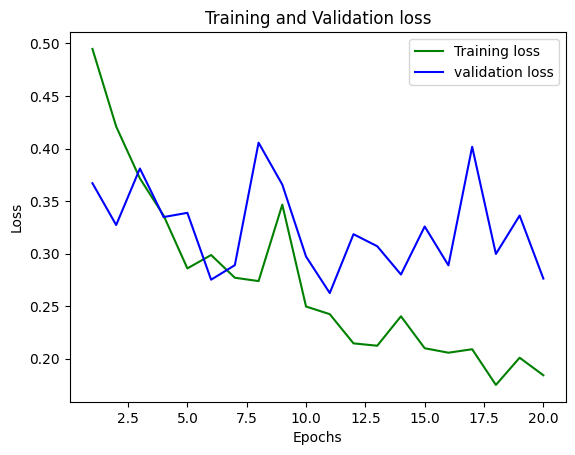

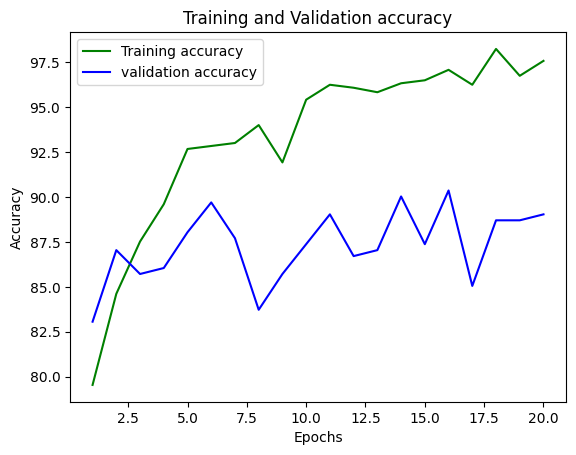

[[168  13]
 [ 20 100]]
Model3 saved to /content/mcheckpoint.pt


In [ ]:
training(model3,'model3')